# Project 3
## Hanwei Wang

In [1]:
import numpy as np
from numpy.linalg import *
import random
import math
import matplotlib.pyplot as plt
from tqdm import tqdm

## Problem 1

(array([0.00092461, 0.        , 0.        , 0.        , 0.        ,
        0.00092461, 0.00184922, 0.00554765, 0.00832148, 0.01571835,
        0.01941679, 0.04253201, 0.0517781 , 0.06842106, 0.08876246,
        0.12667143, 0.14701283, 0.18214797, 0.23854911, 0.28755339,
        0.30234713, 0.32546236, 0.32731158, 0.39943108, 0.35412524,
        0.43641543, 0.37539124, 0.31159322, 0.31714088, 0.25889051,
        0.24409677, 0.19046945, 0.1544097 , 0.13314369, 0.10725464,
        0.10170699, 0.06749645, 0.05825037, 0.04438123, 0.04438123,
        0.04992888, 0.03236131, 0.03975819, 0.03605975, 0.05085349,
        0.05455193, 0.03605975, 0.04438123, 0.04623045, 0.03975819,
        0.04715506, 0.04345662, 0.05917497, 0.05825037, 0.04438123,
        0.04900428, 0.04623045, 0.04345662, 0.04345662, 0.04623045,
        0.0416074 , 0.05547654, 0.04345662, 0.04623045, 0.03975819,
        0.0305121 , 0.0305121 , 0.0416074 , 0.03143671, 0.03421053,
        0.02126601, 0.02403983, 0.02958749, 0.02

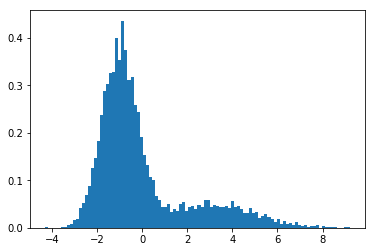

In [2]:
N = 8000
mean = [3,-1]
cov = [2**2,0.8**2]
alpha = [0.25,0.75]
X = []

for i in range(N):
    if(random.randint(1,4) == 1):
        X.append(np.random.normal(mean[0], cov[0]**0.5))
    else:
        X.append(np.random.normal(mean[1], cov[1]**0.5))
plt.hist(X, bins=100, density=1)

## Problem 2

In [3]:
M = 2

##step1: initialize parameters
mean = [10.,-10.]
cov = [5.,5.]
alpha = [0.5,0.5]

def guassian(x, mean, cov):
    return np.exp(-0.5*(x-mean)*(x-mean)/cov)/((2*math.pi*cov)**0.5)

In [4]:
def prob_m(i,m):
    return alpha[m]*p[i][m]/np.sum([alpha[j]*p[i][j] for j in range(M)])

In [5]:
LL = []
for iter in range(41):
    
    p = np.zeros((N,M))
    for n in range(N):
        for m in range(M):
            p[n][m] = guassian(X[n], mean[m], cov[m])

    #step 2
    for m in range(M):
        alpha[m] = np.sum([prob_m(i,m) for i in range(N)]) / N

    #step 3
    for m in range(M):
        mean[m] = np.sum([X[i]*prob_m(i,m) for i in range(N)]) / (N*alpha[m])
        cov[m] = np.sum([(prob_m(i,m))*(X[i]-mean[m])*(X[i]-mean[m]) for i in range(N)]) / (N*alpha[m])
        
    
    #calculate Log Likelyhood
    ll = 0
    for i in range(N):
        tmp = 0
        for m in range(M):
            tmp += alpha[m]*p[i][m]
        ll += math.log(tmp)
    LL.append(ll)

    if(iter % 4 == 0):
        print("Iteration: ",iter+1,"  ----------")
        print("   alpha:",alpha)
        print("   mean:",mean)
        print("   var:",cov)
        print("   LogLikehood:",ll)
        print('\n')

Iteration:  1   ----------
   alpha: [0.33157917824734345, 0.6870730935945734]
   mean: [2.3342520975308125, -1.1408990542048716]
   var: [3.739044116229781, 0.5186460645160267]
   LogLikehood: -76120.23461827243


Iteration:  5   ----------
   alpha: [0.2769584215365935, 0.7240001991398474]
   mean: [2.658089982682267, -1.030485982079213]
   var: [4.665673443326116, 0.588579283720957]
   LogLikehood: -14734.3729163278


Iteration:  9   ----------
   alpha: [0.26387689469822306, 0.7365288010087503]
   mean: [2.8123554187778574, -1.0210154226082286]
   var: [4.351311727251642, 0.6048737448119625]
   LogLikehood: -14731.809042703368


Iteration:  13   ----------
   alpha: [0.2568735726826949, 0.7433354016847981]
   mean: [2.901083184408696, -1.015831145466152]
   var: [4.148183543200939, 0.6134279416638745]
   LogLikehood: -14730.986858752585


Iteration:  17   ----------
   alpha: [0.25292960160201805, 0.7471831125327149]
   mean: [2.952151614785031, -1.0125739854612483]
   var: [4.0287

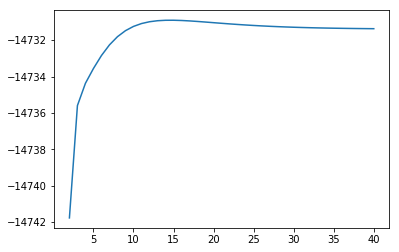

In [6]:
plt.plot([x for x in range(2,41)], LL[2:])

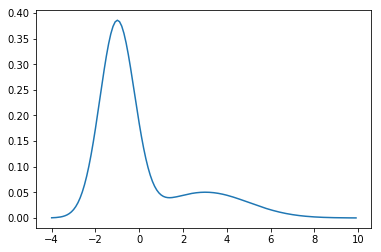

In [7]:
X0 = []
for x0 in np.arange(-4, 10, 0.1):
    X0.append(alpha[0]*guassian(x0, mean[0], cov[0])+alpha[1]*guassian(x0, mean[1], cov[1]))
plt.plot(np.arange(-4,10,0.1), X0)

## Problem 3

In [8]:
def phi(i):
    return abs(i)<0.5

def KDE(x,h):
    return np.sum([phi((x-X[n])/h) for n in range(N)]) / (N*h)

X1 = []
h = 2
for x1 in np.arange(-4,10,0.1):
    X1.append(KDE(x1,h))

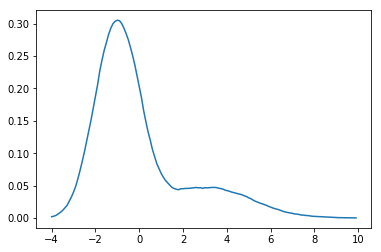

In [9]:
plt.plot(np.arange(-4,10,0.1), X1)

## Problem 4

In [76]:
N = 2000
M = 3

mean = np.array([[-0.5,0.5],[5.5,1.5],[1,4]])
cov = np.array([[[2.0,0.3],[0.3,0.5]],[[4.0,0.3],[0.3,0.5]],[[6.0,1.0],[1.0,2.0]]])
alpha = [0.2,0.3,0.5]

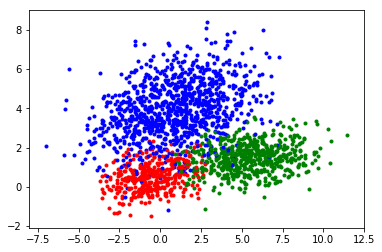

In [77]:
X = []
Y = []
for n in range(N):
    m = random.random()
    if(m < alpha[0]): 
        m = 0
        color = 'r'
    elif(m < alpha[1]+alpha[0]): 
        m = 1
        color = 'g'
    else: 
        m = 2
        color = 'b'
    x,y = np.random.multivariate_normal(mean[m],cov[m]).T
    plt.scatter(x,y,c=color,marker='.')
    X.append(x)
    Y.append(y)

## Problem 5

In [78]:
X = np.array(X)
Y = np.array(Y)

#step 1
mean = np.array([[0.,0.],[5.,5.],[1.,5.]])
cov = np.array([[[1.,0.],[0.,1.]],[[2.,0.],[0.,1.]],[[1.,0.],[0.,2.]]])
alpha = [0.3,0.3,0.4]

def multi_guassian(x, mean, cov):
    return np.exp(-0.5*((x-mean).T).dot(inv(cov)).dot(x-mean))/((2*math.pi*(det(cov)**(0.5))))

In [79]:
def prob_m(i,m):
    return alpha[m]*p[i][m]/np.sum([alpha[j]*p[i][j] for j in range(M)])

In [80]:
LL = []
for iter in range(201):
    
    p = np.zeros((N,M))
    for n in range(N):
        for m in range(M):
            p[n][m] = multi_guassian(np.array([X[n],Y[n]]), mean[m], cov[m])

    #step 2
    for m in range(M):
        alpha[m] = np.sum([prob_m(i,m) for i in range(N)]) / N

    #step 3
    for m in range(M):
        mean[m] = np.sum([np.dot([X[i],Y[i]], prob_m(i,m)) for i in range(N)], axis=0) / (N*alpha[m])
        mat = np.zeros((2,2))
        for i in range(N):
            mat += np.array(prob_m(i,m)).dot((np.array([np.array([X[i],Y[i]])-mean[m]]).T)).dot(np.array([np.array([X[i],Y[i]])-mean[m]]))
        cov[m] = mat / (N*alpha[m])
        
    
    #calculate Log Likelyhood
    ll = 1
    for i in range(N):
        tmp = 0
        for m in range(M):
            tmp += alpha[m]*p[i][m]
        ll += math.log(tmp)
    LL.append(ll)

    if(iter % 20 == 0):
        print("Iteration: ",iter+1,"  ----------")
        print("   alpha:",alpha)
        print("   mean:",mean)
        print("   cov:",cov)
        print("   LogLikehood:",ll)
        print('\n')

Iteration:  1   ----------
   alpha: [0.2966558063821931, 0.3361398443335127, 0.36426578461924614]
   mean: [[-0.35231549  0.8478504 ]
 [ 5.50804509  2.6940716 ]
 [ 0.5408977   3.85595107]]
   cov: [[[ 4.17084104 -0.29400698]
  [-0.29400698  0.87659958]]

 [[ 3.11063526 -1.42274097]
  [-1.42274097  2.94561937]]

 [[ 3.25957391 -0.42292747]
  [-0.42292747  1.80466669]]]
   LogLikehood: -12931.404016940201


Iteration:  21   ----------
   alpha: [0.1971251955951883, 0.29057713412658975, 0.5125445567877667]
   mean: [[-0.42006882  0.47202641]
 [ 5.45236998  1.51478548]
 [ 0.86326078  3.95767596]]
   cov: [[[2.27417622 0.30660895]
  [0.30660895 0.47246665]]

 [[3.68407263 0.22854692]
  [0.22854692 0.53217718]]

 [[5.93239328 1.20240483]
  [1.20240483 1.99523643]]]
   LogLikehood: -8750.88875909048


Iteration:  41   ----------
   alpha: [0.1897858615342324, 0.2901942144285069, 0.5200272405242422]
   mean: [[-0.46370794  0.44961015]
 [ 5.44286719  1.50158474]
 [ 0.87015471  3.92405355]]
   

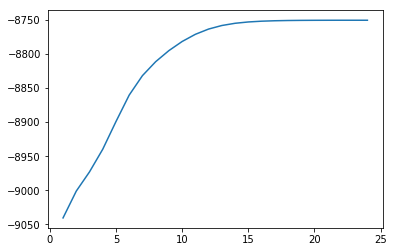

In [85]:
plt.plot([x for x in range(1,25)],LL[1:25])